In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from IPython.display import clear_output

from edmAnalyzer import *
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.linear_model import LinearRegression

In [2]:
run_number = 14

sequence_number = 1815

params_of_interest = None
channel_of_interest = 'phi_NEPR'

df_all = pd.read_csv(r"C:\ACME_analysis\noname0014.1815\Run Results\data\binpara_offsettrace18_bincut_frac15_blockpara_simple2_blockcut_blc1_config_0\Sequence Results\0_PR~DeltaQleanupNEDflat\sequencesipmdf_0_PR~DeltaQleanupNEDflat.csv")

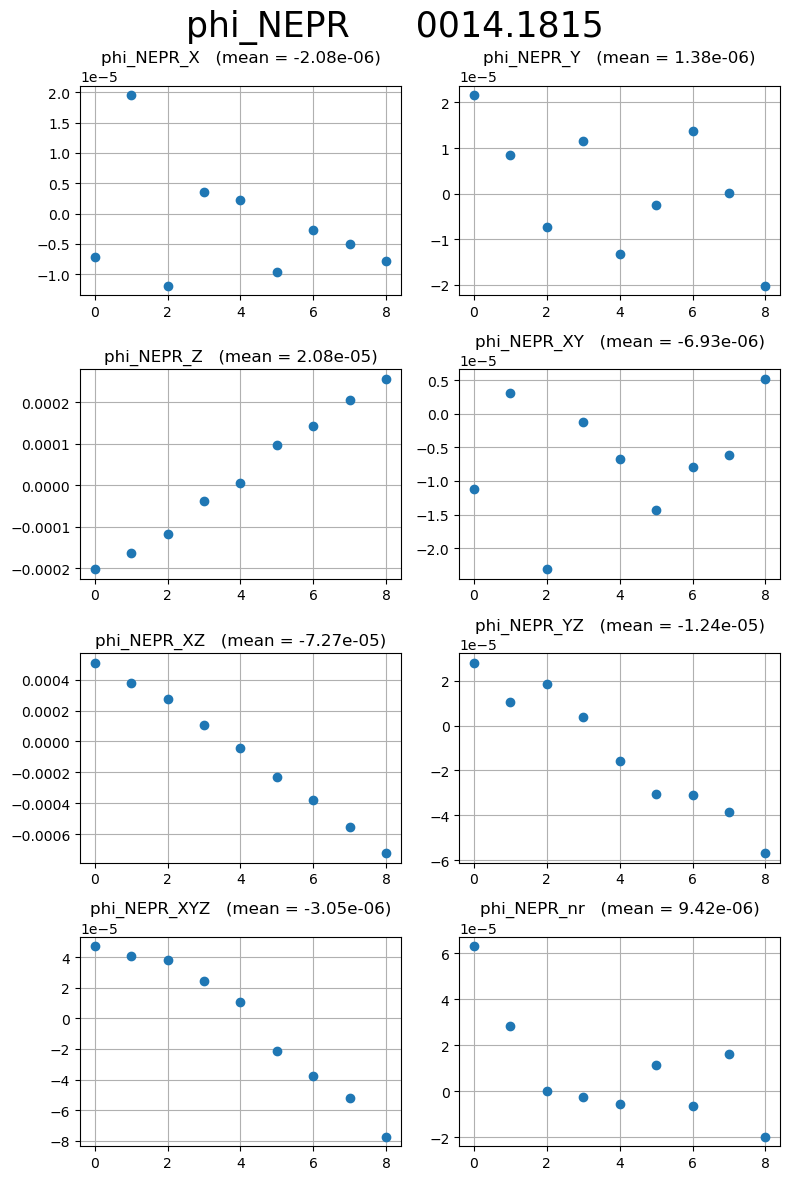

In [3]:
if params_of_interest is not None:
    if 'Dflat' not in df_all.columns:
        columns_of_interest = [params_of_interest] + [channel_of_interest + '_sipm' + str(i) for i in range(8) ]
    else:
        columns_of_interest = [params_of_interest, 'Dflat'] + [channel_of_interest + '_sipm' + str(i) for i in range(8) ]
else:
    if 'Dflat' not in df_all.columns:
        columns_of_interest = [channel_of_interest + '_sipm' + str(i) for i in range(8) ]
    else:
        columns_of_interest = ['Dflat'] + [channel_of_interest + '_sipm' + str(i) for i in range(8) ]

df = df_all[columns_of_interest].copy()
X_val = {    0: +1,    1: -1,    2: +1,    3: -1,    4: +1,    5: -1,    6: +1,    7: -1}
Y_val = {    0: +1,    1: +1,    2: -1,    3: -1,    4: +1,    5: +1,    6: -1,    7: -1}
Z_val = {    0: +1,    1: +1,    2: +1,    3: +1,    4: -1,    5: -1,    6: -1,    7: -1}
df[channel_of_interest + '_nr'] = sum([df[channel_of_interest + '_sipm' + str(i)] for i in range(8)]) / 8
df[channel_of_interest + '_X'] = sum([df[channel_of_interest + '_sipm' + str(i)] * X_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_Y'] = sum([df[channel_of_interest + '_sipm' + str(i)] * Y_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_Z'] = sum([df[channel_of_interest + '_sipm' + str(i)] * Z_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_XY'] = sum([df[channel_of_interest + '_sipm' + str(i)] * X_val[i] * Y_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_XZ'] = sum([df[channel_of_interest + '_sipm' + str(i)] * X_val[i] * Z_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_YZ'] = sum([df[channel_of_interest + '_sipm' + str(i)] * Y_val[i] * Z_val[i] for i in range(8)]) / 8
df[channel_of_interest + '_XYZ'] = sum([df[channel_of_interest + '_sipm' + str(i)] * X_val[i] * Y_val[i] * Z_val[i] for i in range(8)]) / 8


fig, ax = plt.subplots(4, 2, figsize=(8,12))
sci_formatter = ScalarFormatter() 
sci_formatter.set_scientific(True) 
sci_formatter.set_powerlimits((-2, 2))
def plot_with_mean(ax_handle, xvals, yvals, name, use_sci_x=False):
    ax_handle.plot(xvals, yvals, marker='o', linestyle='')
    m = float(np.nanmean(yvals))
    ax_handle.set_title(f"{name}   (mean = {m:.3g})")
    if use_sci_x:
        ax_handle.xaxis.set_major_formatter(sci_formatter)

if params_of_interest is not None:
    #g = df.groupby(params_of_interest).mean().reset_index()
    g = df
    x = g[params_of_interest]

    plot_with_mean(ax[0, 0], x, g[channel_of_interest + '_X'],   channel_of_interest + '_X',   use_sci_x=True)
    plot_with_mean(ax[0, 1], x, g[channel_of_interest + '_Y'],   channel_of_interest + '_Y',   use_sci_x=True)
    plot_with_mean(ax[1, 0], x, g[channel_of_interest + '_Z'],   channel_of_interest + '_Z',   use_sci_x=True)
    plot_with_mean(ax[1, 1], x, g[channel_of_interest + '_XY'],  channel_of_interest + '_XY',  use_sci_x=True)
    plot_with_mean(ax[2, 0], x, g[channel_of_interest + '_XZ'],  channel_of_interest + '_XZ',  use_sci_x=True)
    plot_with_mean(ax[2, 1], x, g[channel_of_interest + '_YZ'],  channel_of_interest + '_YZ',  use_sci_x=True)
    plot_with_mean(ax[3, 0], x, g[channel_of_interest + '_XYZ'], channel_of_interest + '_XYZ', use_sci_x=True)
    plot_with_mean(ax[3, 1], x, g[channel_of_interest + '_nr'],  channel_of_interest + '_nr',  use_sci_x=True)

else:
    x = range(len(df))

    plot_with_mean(ax[0, 0], x, df[channel_of_interest + '_X'],   channel_of_interest + '_X')
    plot_with_mean(ax[0, 1], x, df[channel_of_interest + '_Y'],   channel_of_interest + '_Y')
    plot_with_mean(ax[1, 0], x, df[channel_of_interest + '_Z'],   channel_of_interest + '_Z')
    plot_with_mean(ax[1, 1], x, df[channel_of_interest + '_XY'],  channel_of_interest + '_XY')
    plot_with_mean(ax[2, 0], x, df[channel_of_interest + '_XZ'],  channel_of_interest + '_XZ')
    plot_with_mean(ax[2, 1], x, df[channel_of_interest + '_YZ'],  channel_of_interest + '_YZ')
    plot_with_mean(ax[3, 0], x, df[channel_of_interest + '_XYZ'], channel_of_interest + '_XYZ')
    plot_with_mean(ax[3, 1], x, df[channel_of_interest + '_nr'],  channel_of_interest + '_nr')

for axis in ax.flat:
    axis.grid(True)
    axis.set_xlabel(params_of_interest, fontsize=12)

plt.suptitle(channel_of_interest + r"      " + str(run_number).zfill(4) + '.' + str(sequence_number).zfill(4), fontsize=25)
plt.tight_layout()
plt.savefig(r"C:\ACME_analysis\NEPRsipmparity" + r"\\" + str(run_number).zfill(4) + '.' + str(sequence_number).zfill(4) + '_' + channel_of_interest + '.png', dpi=300)

In [ ]:
df_all['zsipm_NE_sipmavg']
df_all['Delta_Qleanup_NE']
df['phi_NEPR_XZ']


0   -0.008419
1   -0.006441
2   -0.004208
3   -0.001663
4    0.000820
5    0.003584
6    0.006144
7    0.009305
8    0.011419
Name: zsipm_NE_sipmavg, dtype: float64

In [10]:
df2 = pd.DataFrame({'zsipm_NE': df_all['zsipm_NE_sipmavg'],
                    'Delta_Qleanup_NE': df_all['Delta_Qleanup_NE'],'phi_NEPR_XZ': df['phi_NEPR_XZ']})

In [12]:
df2.to_csv(r"C:\ACME_analysis\NEPRsipmparity" + r"\\" + str(run_number).zfill(4) + '.' + str(sequence_number).zfill(4) + '_NEPRsipmparity.csv', index=False)